<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [22]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [23]:
print(df.describe())
print(df.dtypes)

         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
mean         7.522140       10.060857       24.343232        22.96522   
std         18.422661       21.833836       27.089360        27.01774   
min          0.000000        0.000000        0.000000         0.00000   
25%          0.000000 

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [24]:
df.isna().sum()
#imputing relevant columns

most_frequent_rw = df["RemoteWork"].mode()[0]
df["RemoteWork"] = df["RemoteWork"].fillna(most_frequent_rw)

df["ConvertedCompYearly"] = df["ConvertedCompYearly"].fillna(df["ConvertedCompYearly"].mean())

df = df.dropna(subset=["ConvertedCompYearly", "JobSat", "YearsCodePro"])

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [25]:
print(df["Employment"].value_counts().sum())
print(df["JobSat"].value_counts().sum())
print(df["YearsCodePro"].value_counts().sum())


28356
28356
28356


### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


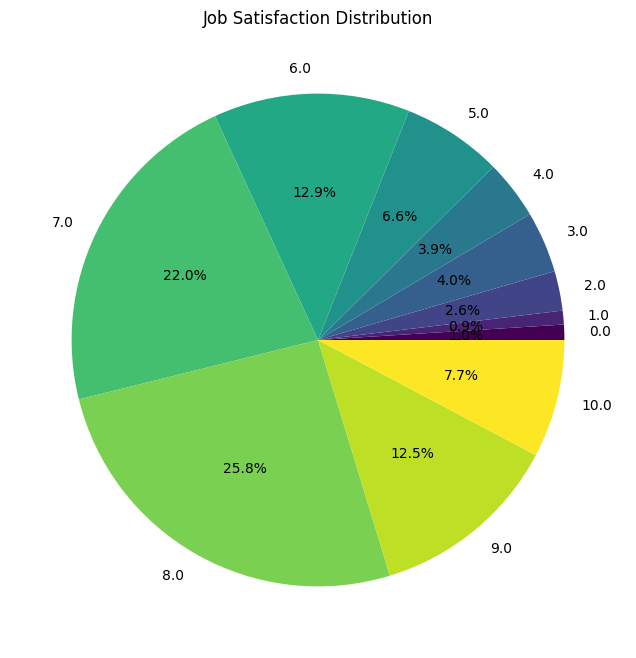

In [34]:
#Pie Chart
df["JobSat"].value_counts().sort_index().plot.pie(autopct="%1.1f%%", figsize=(8,8), colormap="viridis")
plt.title("Job Satisfaction Distribution")
plt.ylabel("")
plt.show()

According to the visualization, most respondents report high job satisfaction, with scores of 7.0, 8.0, and 9.0 accounting for around 60% of the responses

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


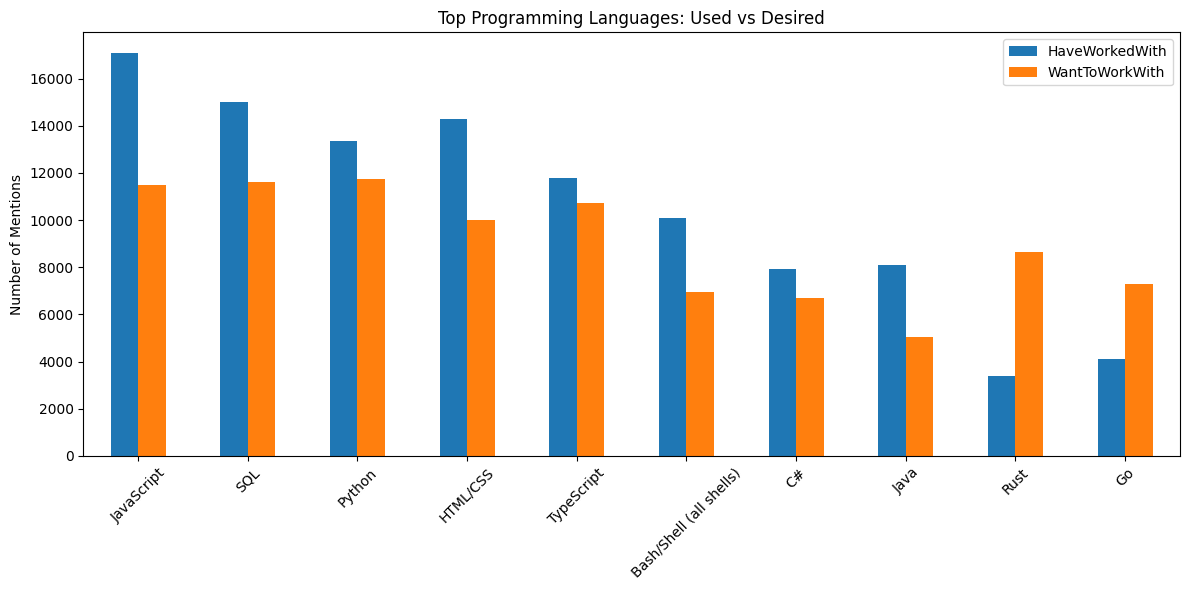

In [ ]:
from collections import Counter
#Counter
worked = Counter()
want = Counter()

#Extracting information from LanguageHaveWorkedWith", "LanguageWantToWorkWith
df_langs = df.dropna(subset=["LanguageHaveWorkedWith", "LanguageWantToWorkWith"])
for row in df_langs["LanguageHaveWorkedWith"]:
    worked.update([lang.strip() for lang in row.split(";")])

for row in df_langs["LanguageWantToWorkWith"]:
    want.update([lang.strip() for lang in row.split(";")])

# Transform into DF
df_combined = pd.DataFrame({
    'HaveWorkedWith': pd.Series(worked),
    'WantToWorkWith': pd.Series(want)
}).fillna(0)

# Filter top N
top_langs = df_combined.sum(axis=1).sort_values(ascending=False).head(10)
df_top = df_combined.loc[top_langs.index]

# Grouped Chart
df_top.plot(kind='bar', figsize=(12,6))
plt.title("Top Programming Languages: Used vs Desired")
plt.ylabel("Number of Mentions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


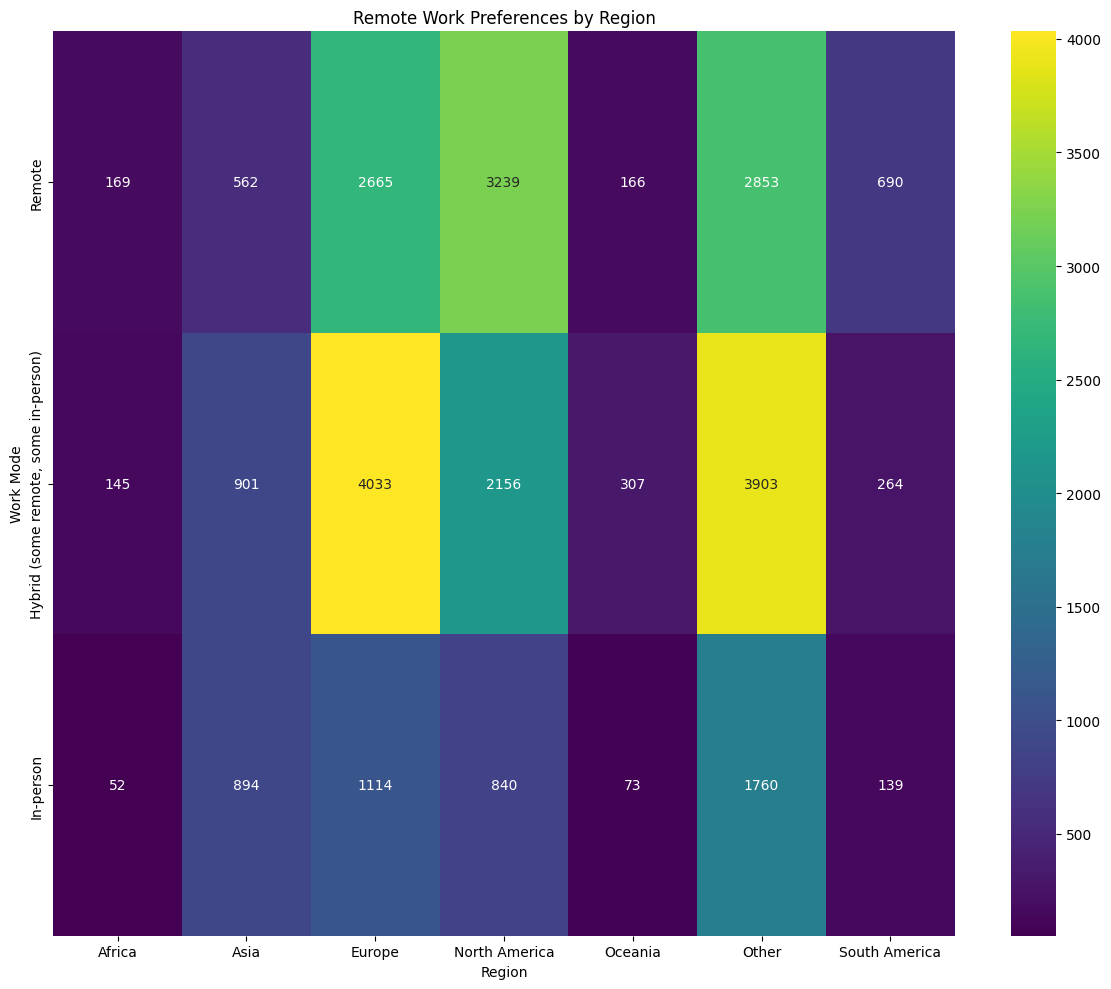

In [ ]:
#Create a Region list
region_map = {
    'United States of America': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'Brazil': 'South America',
    'Argentina': 'South America',
    'Chile': 'South America',
    'Colombia': 'South America',
    'Peru': 'South America',
    'United Kingdom of Great Britain and Northern Ireland': 'Europe',
    'Germany': 'Europe',
    'France': 'Europe',
    'Italy': 'Europe',
    'Spain': 'Europe',
    'Netherlands': 'Europe',
    'Poland': 'Europe',
    'Australia': 'Oceania',
    'India': 'Asia',
    'China': 'Asia',
    'Japan': 'Asia',
    'Pakistan': 'Asia',
    'South Korea': 'Asia',
    'Russian Federation': 'Europe',
    'Egypt': 'Africa',
    'South Africa': 'Africa',
    'Nigeria': 'Africa',
}

#Splitting tRemoteWork into multiples rows to analyze by language
df_exploded = df.assign(Language=df["RemoteWork"].str.split(";")).explode("Language")
df_exploded["RemoteWork"] = df_exploded["RemoteWork"].str.strip()
df_exploded["Region"] = df_exploded["Country"].map(region_map).fillna("Other")

#Group language by region
lang_region_matrix = df_exploded.groupby(["Region", "RemoteWork"]).size().reset_index(name="Count")
heatmap_data = lang_region_matrix.pivot(index="RemoteWork", columns="Region", values="Count").fillna(0)

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data.loc[["Remote", "Hybrid (some remote, some in-person)", "In-person"]], 
            cmap="viridis", annot=True, fmt=".0f")

plt.title("Remote Work Preferences by Region")
plt.xlabel("Region")
plt.ylabel("Work Mode")
plt.tight_layout()
plt.show()



### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [59]:
from scipy.stats import pearsonr
x = pd.to_numeric(df["JobSat"], errors='coerce')
y = pd.to_numeric(df["YearsCodePro"], errors='coerce')

#mask NaN values
mask = x.notna() & y.notna()
x_clean = x[mask]
y_clean = y[mask]

#calculate personr
corr, p_value = pearsonr(x_clean, y_clean)

print("Pearson Correlation", corr)
print("P-Value", p_value)

Pearson Correlation 0.10319635682184262
P-Value 6.657607263272614e-63


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


C:\Users\Infer\AppData\Local\Temp\ipykernel_29036\1086280748.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


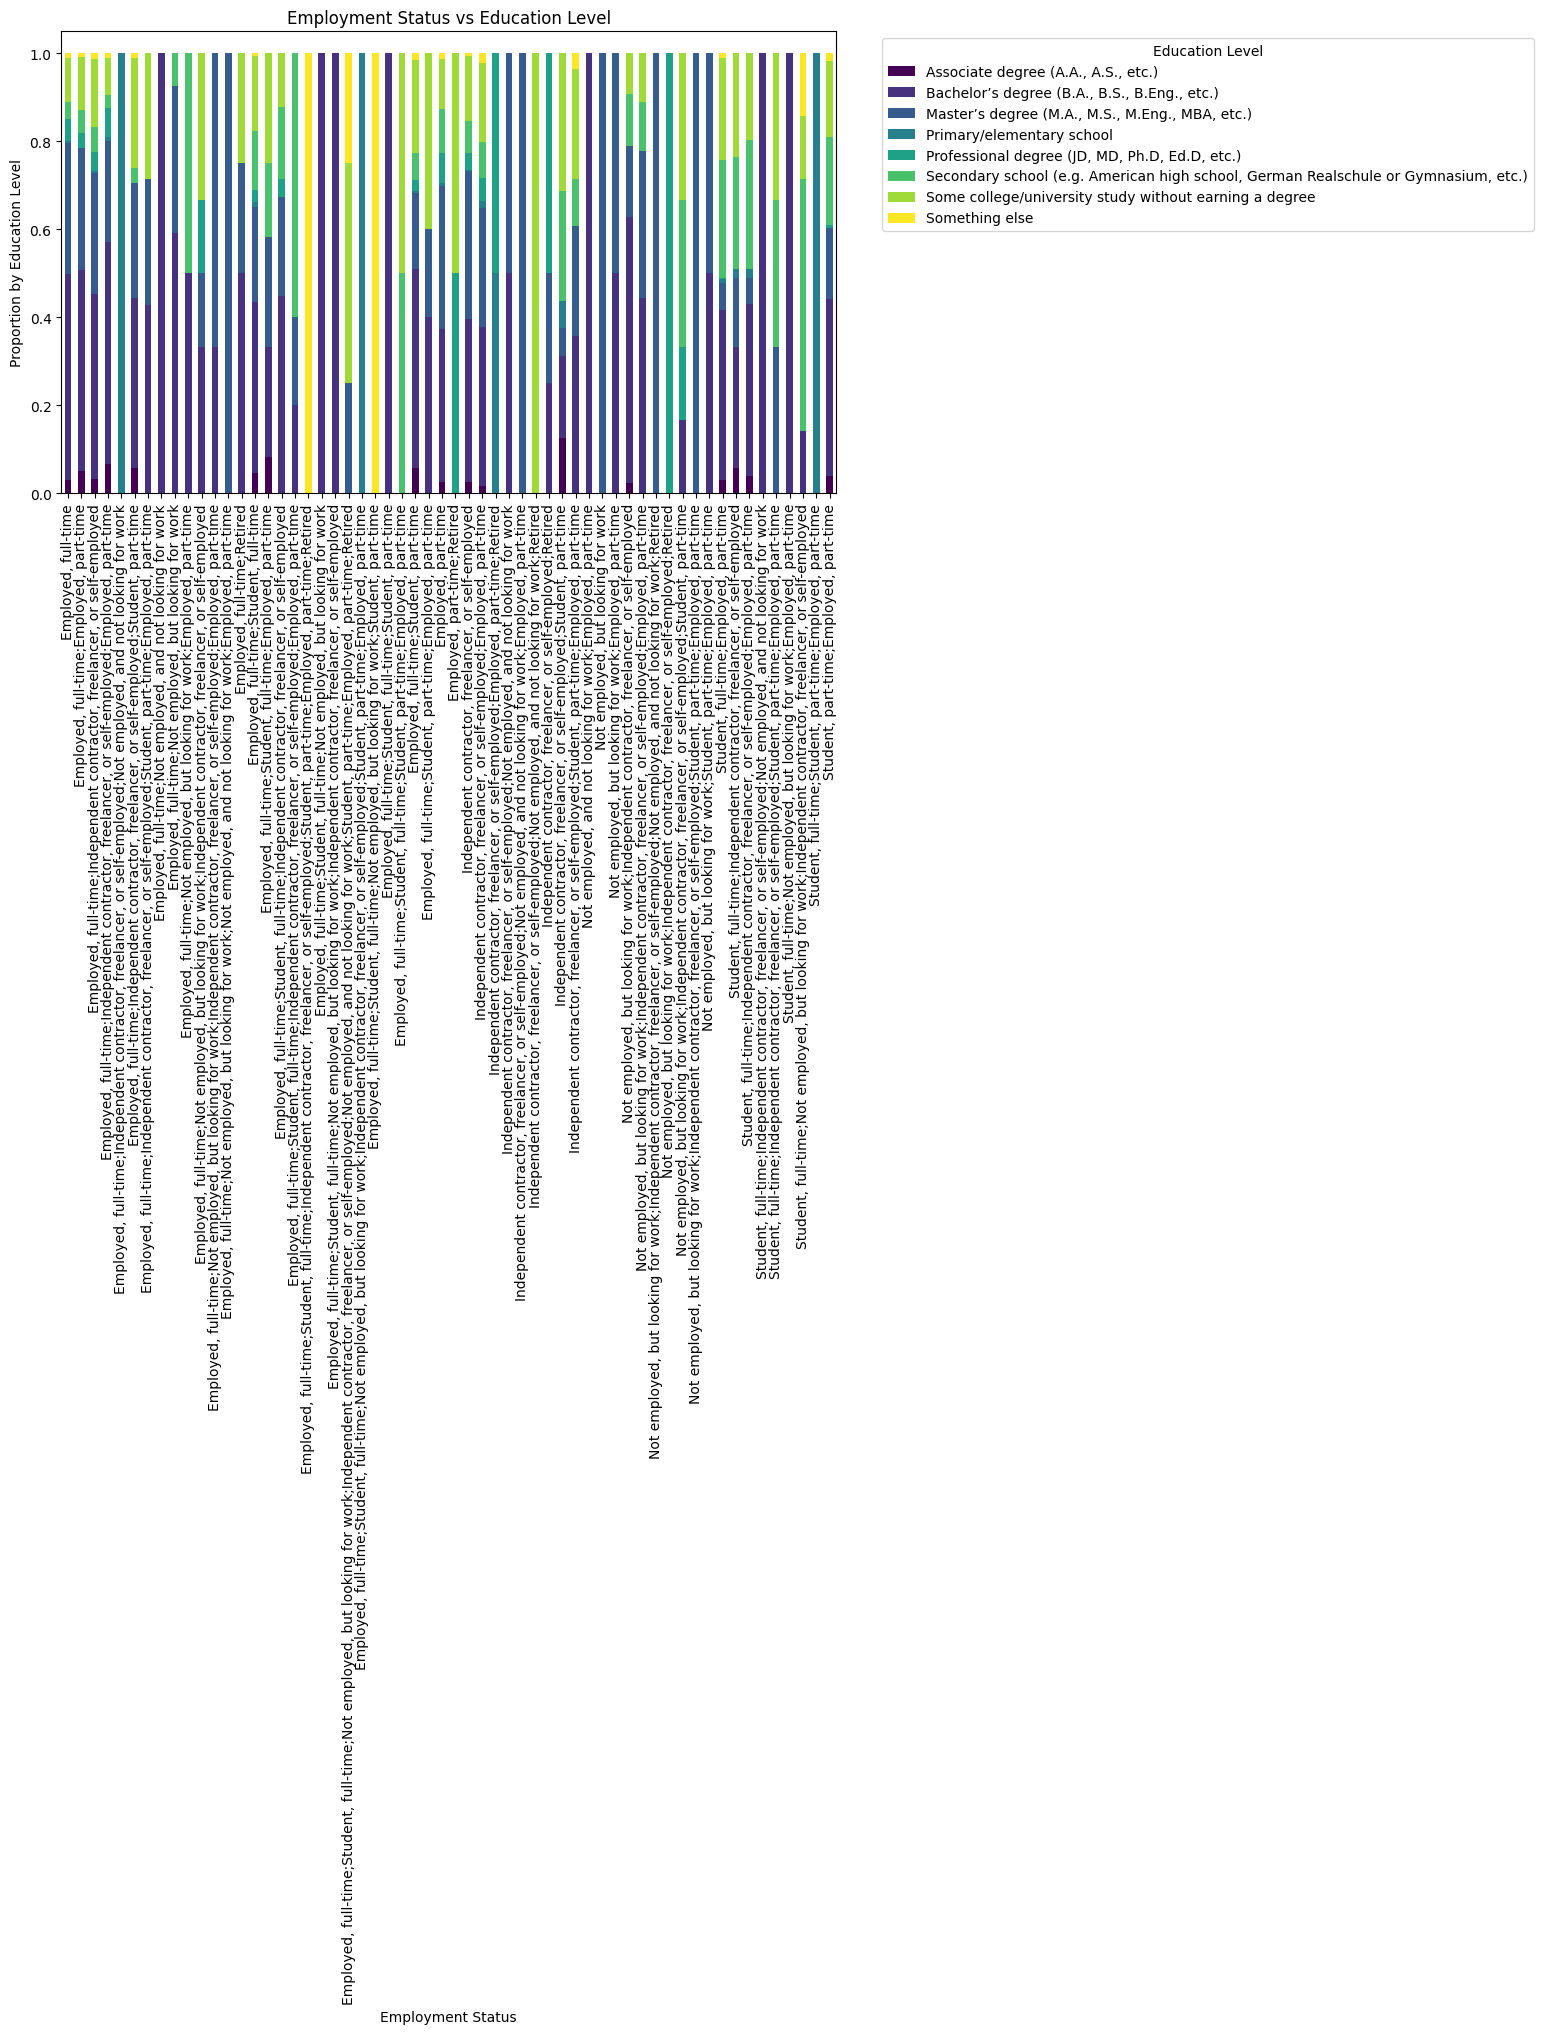

In [75]:
# Crosstab 
employment_edlevel = pd.crosstab(df["Employment"], df["EdLevel"],normalize="index")

#Stacked bar
employment_edlevel.plot(kind="bar", stacked=True, figsize=(10,6), colormap="viridis")
plt.title("Employment Status vs Education Level")
plt.xlabel("Employment Status")
plt.ylabel("Proportion by Education Level")
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here
pd.to_csv("cleaned_stackflow_data2.csv")

Employment
Employed, full-time                                                                                                                                                                                                     1
Employed, full-time;Employed, part-time                                                                                                                                                                                 1
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                                                                1
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time                                                                                                                            1
Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work      

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
